# LOAD MODELS

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
%matplotlib inline
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from nidocr.model import OCR
ocr=OCR("models")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Segmentation Models: using `tf.keras` framework.
#LOG     :Extractor Loaded
#LOG     :Extractor Initialized
#LOG     :Loaded Detection Model,craft
#LOG     :Detector Loaded
#LOG     :Detector Initialized
#LOG     :Label len:80
#LOG     :Vocab len:1504
#LOG     :Pad Value:1506
#LOG     :Start End:1505
#LOG     :encm loaded
#LOG     :seqm loaded
#LOG     :posm loaded
#LOG     :fusm loaded
#LOG     :Recognizer Loaded


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

#LOG     :Recognizer Initialized
#LOG     :Face Matcher Initialized


# Start

#LOG     :------------------------------------------------
#LOG     :Data
#LOG     :------------------------------------------------


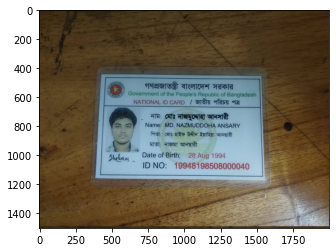

In [2]:
from nidocr.utils import *
from nidocr.data  import card
# card_type="smart"
# if card_type=="nid":
#     src=card.nid.front
#     region_dict=card.nid.front.box_dict
# else:
#     src=card.smart.front
#     region_dict=card.smart.front.box_dict
img=cv2.imread(f"tests/t3.jpg")
display_data("Data",img)

In [ ]:
face,sign,data=ocr.extract(img)
display_data("face",face,cv_color=False)
display_data("sign",sign,cv_color=False)
data

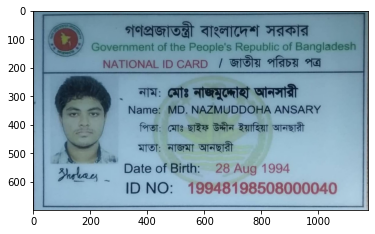

In [4]:
card_type,img=ocr.extractor.process("tests/t3.jpg")
plt.imshow(img)
plt.show()

if card_type=="nid": 
    src=card.nid.front
    two_step_recog=True
else: 
    src=card.smart.front
    two_step_recog=False

# face and sign
img=cv2.resize(img,(card.width,card.height))

# boxes
text_boxes=ocr.detect_boxes(img)
box_dict,df=ocr.process_boxes(text_boxes,src.box_dict)

In [5]:
df

,box,field
0,"[412, 292, 472, 321]",English Name
1,"[483, 292, 730, 321]",English Name
2,"[484, 232, 667, 281]",English Name
3,"[735, 291, 882, 321]",English Name
4,"[323, 343, 388, 376]",Fathers Name
5,"[412, 350, 462, 377]",Fathers Name
6,"[469, 344, 539, 378]",Fathers Name
7,"[546, 341, 617, 375]",Fathers Name
8,"[624, 343, 722, 378]",Fathers Name
9,"[729, 342, 832, 378]",Fathers Name


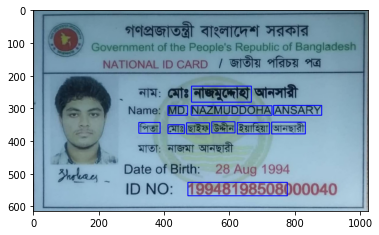

In [8]:
boxes=df.box.tolist()

for box in boxes:
    x_min,y_min,x_max,y_max=box
    cv2.rectangle(img, (x_min,y_min), (x_max,y_max), (0,0,255), 2)
plt.imshow(img)
plt.show()